# Collection of all plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gvar as gv

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import bs_ls_avg
from lametlat.utils.constants import *

## Plots of raw data

In [2]:
from read_data import get_2pt_data, get_ratio_data, get_sum_data, get_fh_data
from lametlat.preprocess.read_raw import pt2_to_meff

### Effective mass

/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in sqrt
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


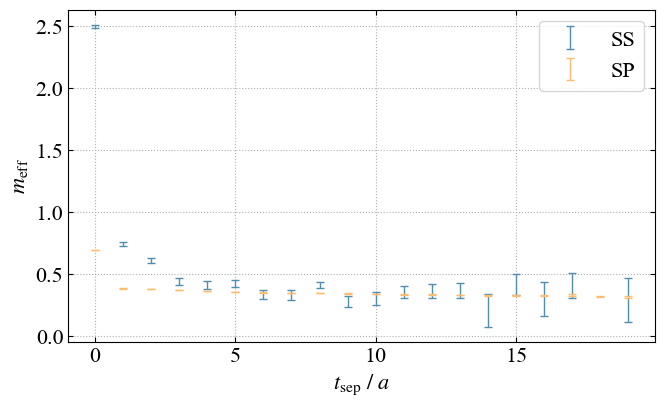

In [3]:
px = py = 0
pz = 0

pt2_ss_real, pt2_ss_imag = get_2pt_data("SS", px, py, pz, jk_bs="bs")

meff_ss = pt2_to_meff(bs_ls_avg(pt2_ss_real), boundary="periodic")[:20]

pt2_sp_real, pt2_sp_imag = get_2pt_data("SP", px, py, pz, jk_bs="bs")

meff_sp = pt2_to_meff(bs_ls_avg(pt2_sp_real), boundary="periodic")[:20]

x_ls = [np.arange(20), np.arange(20)]
y_ls = [gv.mean(meff_ss), gv.mean(meff_sp)]
yerr_ls = [gv.sdev(meff_ss), gv.sdev(meff_sp)]
label_ls = ["SS", "SP"]

fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, color=color_ls[idx], label=label_ls[idx], **errorb)
ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"$m_{\mathrm{eff}}$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()

### Ratio data plot

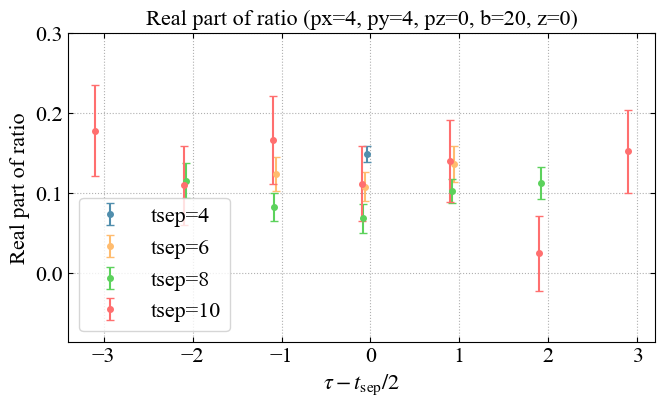

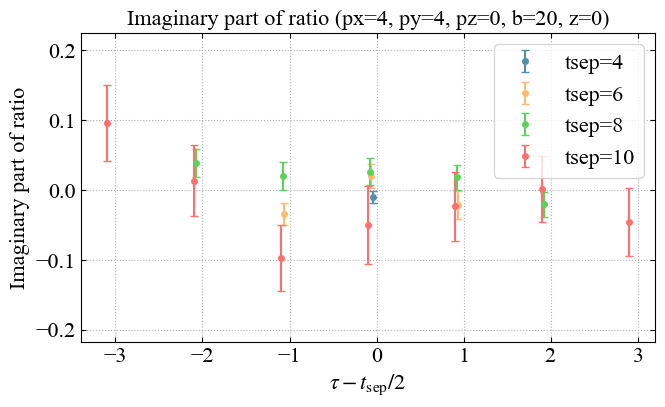

In [71]:
px = py = 4
pz = 0
b = 20
z = 0
tsep_ls = [4, 6, 8, 10]
tau_cut_plot = 2
flavor = None  # None means (U-D)/2

ra_real, ra_imag = get_ratio_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", flavor=flavor)
ra_real_avg = bs_ls_avg(ra_real)
ra_imag_avg = bs_ls_avg(ra_imag)

# * real part
x_ls = []
y_ls = []
yerr_ls = []
label_ls = []

for id in range(len(tsep_ls)):
    tsep = tsep_ls[id]
    x_ls.append(
        np.arange(tau_cut_plot, tsep + 1 - tau_cut_plot) - tsep / 2 - tsep * 0.01
    )
    y_ls.append(gv.mean(ra_real_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    yerr_ls.append(gv.sdev(ra_real_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    label_ls.append(f"tsep={tsep}")

fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$\tau - t_{\mathrm{sep}}/2$", **fs_p)
ax.set_ylabel("Real part of ratio", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
# ax.set_ylim(0.9, 1.2)
plt.title(f"Real part of ratio (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()


# * Imaginary part
x_ls = []
y_ls = []
yerr_ls = []
label_ls = []

for id in range(len(tsep_ls)):
    tsep = tsep_ls[id]
    x_ls.append(
        np.arange(tau_cut_plot, tsep + 1 - tau_cut_plot) - tsep / 2 - tsep * 0.01
    )
    y_ls.append(gv.mean(ra_imag_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    yerr_ls.append(gv.sdev(ra_imag_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    label_ls.append(f"tsep={tsep}")

# Imaginary part
fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$\tau - t_{\mathrm{sep}}/2$", **fs_p)
ax.set_ylabel("Imaginary part of ratio", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Imaginary part of ratio (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()

### Sum data plot

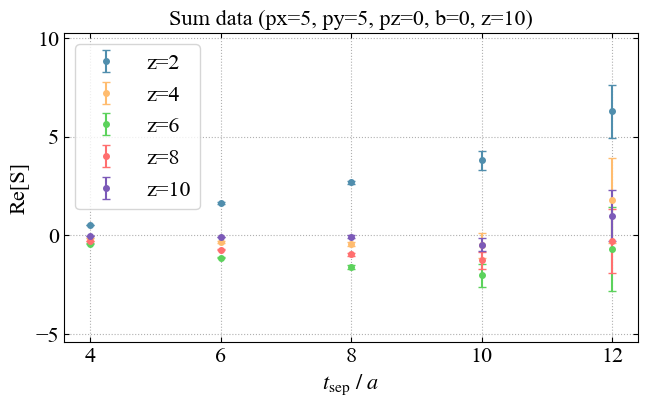

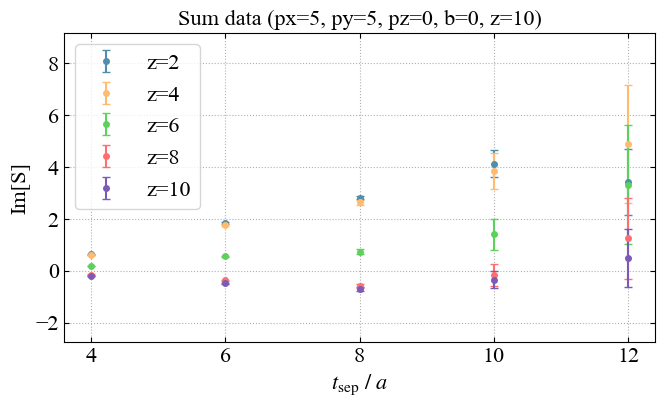

In [65]:
px = py = 5
pz = 0
b = 0
tsep_ls = [4, 6, 8, 10, 12]
tau_cut_plot = 2
z_ls = np.arange(2, 12, 2)
flavor = None  # None means (U-D)/2


# * real part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    sum_real, sum_imag = get_sum_data(
        px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor
    )
    sum_real_avg = bs_ls_avg(sum_real)

    x_ls.append(np.array(tsep_ls))
    y_ls.append(gv.mean(sum_real_avg))
    yerr_ls.append(gv.sdev(sum_real_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot()

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Re[S]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
# ax.set_ylim(2.5, 7.5)
plt.title(f"Sum data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()


# * Imaginary part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    sum_real, sum_imag = get_sum_data(
        px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor
    )
    sum_imag_avg = bs_ls_avg(sum_imag)

    x_ls.append(np.array(tsep_ls))
    y_ls.append(gv.mean(sum_imag_avg))
    yerr_ls.append(gv.sdev(sum_imag_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot()

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Im[S]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Sum data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()

### FH data plot

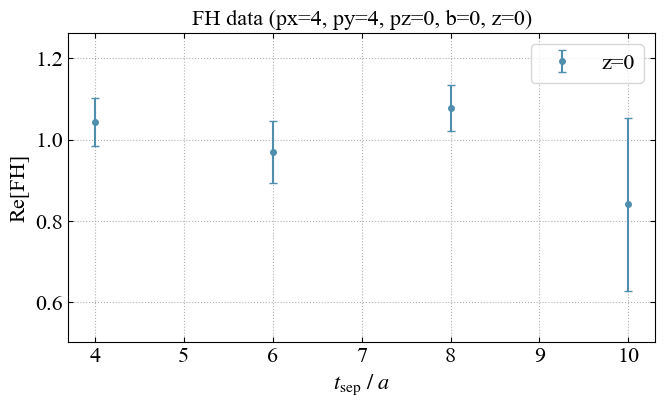

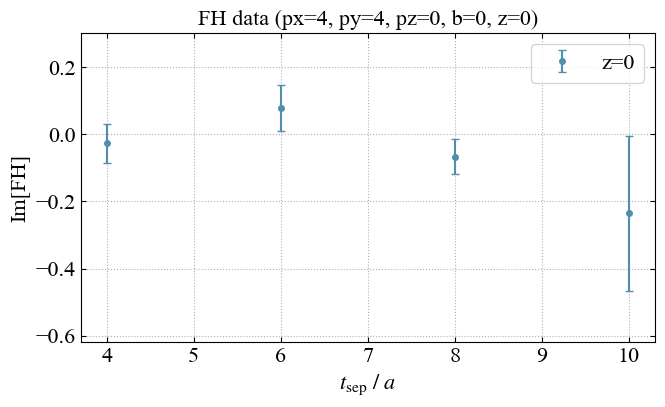

In [6]:
px = py = 4
pz = 0
b = 0
tsep_ls = [4, 6, 8, 10, 12]
tau_cut_plot = 2
z_ls = np.arange(0, 2, 2)
flavor = None  # None means (U-D)/2


# * real part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    fh_real, fh_imag = get_fh_data(
        px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor
    )
    fh_real_avg = bs_ls_avg(fh_real)

    x_ls.append(np.array(tsep_ls)[:-1])
    y_ls.append(gv.mean(fh_real_avg))
    yerr_ls.append(gv.sdev(fh_real_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot()

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Re[FH]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"FH data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()


# * Imaginary part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    fh_real, fh_imag = get_fh_data(
        px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor
    )
    fh_imag_avg = bs_ls_avg(fh_imag)

    x_ls.append(np.array(tsep_ls)[:-1])
    y_ls.append(gv.mean(fh_imag_avg))
    yerr_ls.append(gv.sdev(fh_imag_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot()

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Im[FH]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"FH data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()

## Plots of ground state fit

In [7]:
from lametlat.utils.log import set_up_log
from lametlat.gsfit.pt2_fit import pt2_two_state_fit
from lametlat.gsfit.ratio_fit import ra_two_state_fit
from lametlat.gsfit.sum_fit import sum_one_state_fit, sum_two_state_fit
from lametlat.gsfit.fh_fit import fh_one_state_fit

a = 0.06
Ls = 48
Lt = 64

### 2pt tmin stability

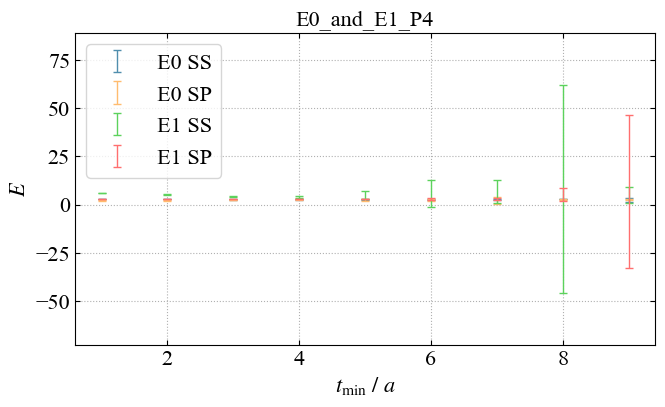

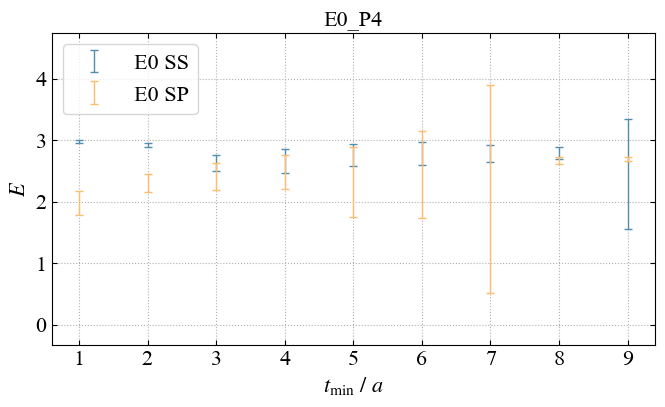

In [8]:
px = py = 4
pz = 0
tmin_ls = np.arange(1, 10)
tmax = 13
set_up_log("../log/gsfit/2pt.log")


# Retrieve and average the data once outside the loop
pt2_ss_re, _ = get_2pt_data("SS", px, py, pz, jk_bs="bs")
pt2_sp_re, _ = get_2pt_data("SP", px, py, pz, jk_bs="bs")
pt2_ss_avg = bs_ls_avg(pt2_ss_re)
pt2_sp_avg = bs_ls_avg(pt2_sp_re)

# Initialize lists to store fit results
fit_results = {
    "ss": {"e0": [], "e1": [], "Q": []},
    "sp": {"e0": [], "e1": [], "Q": []},
}

# Perform fits for each tmin value
for tmin in tmin_ls:
    ss_fit_res = pt2_two_state_fit(
        pt2_ss_avg, tmin, tmax, Lt, label=f"2pt_P{px}_tmin_{tmin}_SS"
    )
    sp_fit_res = pt2_two_state_fit(
        pt2_sp_avg, tmin, tmax, Lt, label=f"2pt_P{px}_tmin_{tmin}_SP"
    )

    # Append results to corresponding lists
    fit_results["ss"]["e0"].append(ss_fit_res.p["E0"])
    fit_results["ss"]["e1"].append(ss_fit_res.p["E0"] + ss_fit_res.p["dE1"])
    fit_results["ss"]["Q"].append(ss_fit_res.Q)

    fit_results["sp"]["e0"].append(sp_fit_res.p["E0"])
    fit_results["sp"]["e1"].append(sp_fit_res.p["E0"] + sp_fit_res.p["dE1"])
    fit_results["sp"]["Q"].append(sp_fit_res.Q)


# Define a function to plot the results
def plot_energy_levels(include_e1=False):
    """
    Plot the energy levels.

    Args:
        include_e1 (bool, optional): Whether to include the E1 energy level. Defaults to False.
    """

    e0_ss_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["ss"]["e0"]
    ]
    e0_sp_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["sp"]["e0"]
    ]
    e1_ss_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["ss"]["e1"]
    ]
    e1_sp_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["sp"]["e1"]
    ]

    x_ls = [tmin_ls] * (4 if include_e1 else 2)
    y_ls = [gv.mean(e0_ss_gev_ls), gv.mean(e0_sp_gev_ls)]
    yerr_ls = [gv.sdev(e0_ss_gev_ls), gv.sdev(e0_sp_gev_ls)]
    label_ls = [f"E0 SS", f"E0 SP"]

    if include_e1:
        y_ls.append(gv.mean(e1_ss_gev_ls))
        y_ls.append(gv.mean(e1_sp_gev_ls))
        yerr_ls.append(gv.sdev(e1_ss_gev_ls))
        yerr_ls.append(gv.sdev(e1_sp_gev_ls))
        label_ls.append(f"E1 SS")
        label_ls.append(f"E1 SP")

    fig, ax = default_plot()

    for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
        ax.errorbar(x, y, yerr=yerr, color=color_ls[idx], label=label_ls[idx], **errorb)

    ax.set_xlabel(r"$t_{\mathrm{min}}~/~a$", **fs_p)
    ax.set_ylabel(r"$E $", **fs_p)
    ax.legend(**fs_p)
    ax.set_ylim(auto_ylim(y_ls, yerr_ls))
    plt.title(f"E{'0_and_E1' if include_e1 else '0'}_P{px}", **fs_p)
    plt.tight_layout()
    plt.show()


# Plot energy levels
plot_energy_levels(include_e1=True)
plot_energy_levels(include_e1=False)

### Dispersion relation

Least Square Fit:
  chi2/dof [dof] = 0.26 [6]    Q = 0.95    logGBF = -4.8816

Parameters:
              m    1.26 (67)     [  1.0 (1.0) ]  
             c1    0.83 (40)     [  1.0 (1.0) ]  
             c2    0.16 (25)     [    0 ± 1.0 ]  

Fit:
     x[k]         y[k]    f(x[k],p)
-----------------------------------
  1.21764    5.0 (3.0)    1.69 (35)  *
  1.82646    2.22 (30)    2.12 (18)  
  2.43528    2.63 (13)    2.65 (10)  
   3.0441    3.22 (16)    3.25 (10)  
  3.65292    3.98 (25)    3.91 (15)  
  4.26174    4.60 (38)    4.63 (29)  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 6/0.0)
  fitter = scipy_least_squares    method = trf



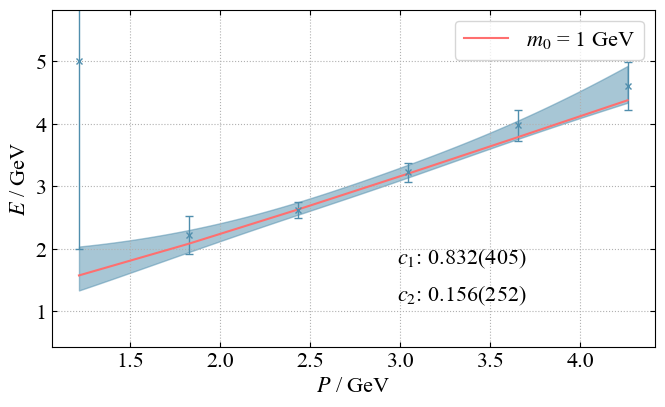

In [9]:
from lametlat.preprocess.dispersion import disp_relation_plot

tmin = 3
tmax = 13
pz = 0
m0 = 1
set_up_log("../log/gsfit/2pt.log")

mom_ls, e0_ss_ls, e0_sp_ls = [], [], []

for px in range(2, 8):
    py = px
    pnorm = np.sqrt(px**2 + py**2)

    pt2_ss_re, _ = get_2pt_data("SS", px, py, pz, jk_bs="bs")
    pt2_sp_re, _ = get_2pt_data("SP", px, py, pz, jk_bs="bs")
    pt2_ss_avg = bs_ls_avg(pt2_ss_re)
    pt2_sp_avg = bs_ls_avg(pt2_sp_re)

    ss_fit_res = pt2_two_state_fit(
        pt2_ss_avg, tmin, tmax, Lt, label=f"2pt_P{px}_SS"
    )
    sp_fit_res = pt2_two_state_fit(
        pt2_sp_avg, tmin, tmax, Lt, label=f"2pt_P{px}_SP"
    )
    
    e0_ss_ls.append(ss_fit_res.p["E0"])
    e0_sp_ls.append(sp_fit_res.p["E0"])
    mom_ls.append(pnorm)
    

ax = disp_relation_plot(a, Ls, mom_ls, e0_ss_ls, m0=1)

### Ratio fit plot

Least Square Fit:
  chi2/dof [dof] = 0.68 [42]    Q = 0.95    logGBF = 19.815

Parameters:
             E0    0.980 (47)     [  0.980 (47) ]  
       log(dE1)   -0.739 (72)     [ -0.738 (72) ]  
         pdf_re   -0.089 (84)     [      1 (10) ]  
         pdf_im    0.084 (92)     [      1 (10) ]  
         O01_re    0.080 (38)     [      1 (10) ]  
         O01_im   -0.008 (37)     [      1 (10) ]  
         O11_re    -0.29 (50)     [      1 (10) ]  
         O11_im    -1.39 (95)     [      1 (10) ]  
          re_z0    0.132 (30)     [  0.132 (30) ]  
          re_z1   -0.353 (11)     [ -0.353 (11) ]  
-------------------------------------------------
            dE1    0.478 (34)     [  0.478 (35) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 8/0.0)
  fitter = scipy_least_squares    method = trf



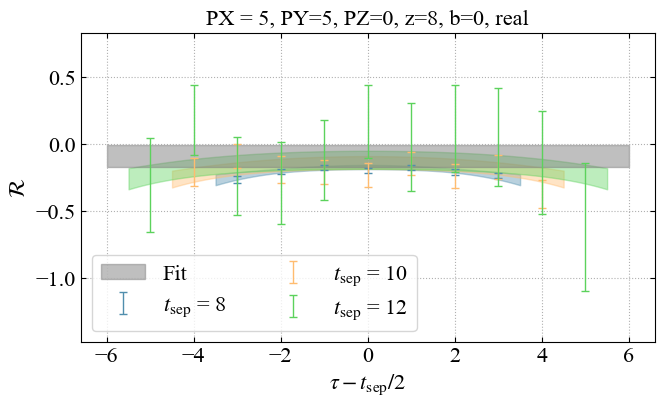

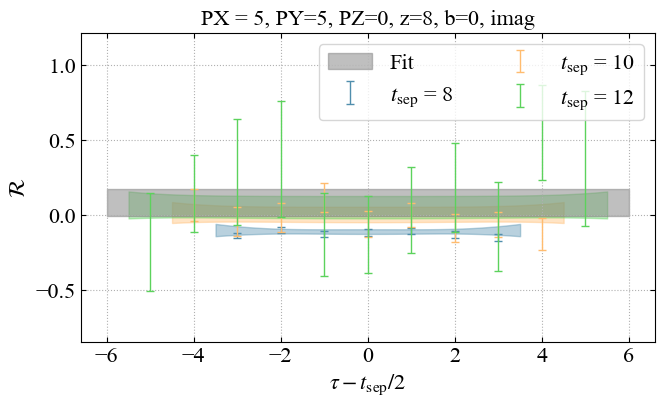

In [10]:
#! plot ratio fit on data
from lametlat.gsfit.ratio_fit import plot_ra_fit_on_data

px = py = 5
pz = 0
b = 0
z = 8
err_tsep_ls = [8, 10, 12]
fill_tsep_ls = [8, 10, 12]
tau_cut = 2


id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

# * 2pt fit
# Retrieve 2pt data (real parts only, as imaginary parts are not used)
pt2_ss_re = get_2pt_data('SS', px, py, pz, jk_bs="bs")[0]
pt2_ss_avg = bs_ls_avg(pt2_ss_re)

# Perform 2pt fits
ss_fit_res = pt2_two_state_fit(pt2_ss_avg, tmin=3, tmax=13, Lt=Lt, label=f"2pt_P{px}_SS")


# data for fit
ra_re, ra_im = get_ratio_data(px, py, pz, b, z, fill_tsep_ls, jk_bs="bs")

# Average over bootstraps.
ra_re_avg = bs_ls_avg(ra_re.reshape(len(ra_re), -1)).reshape(len(fill_tsep_ls), -1)
ra_im_avg = bs_ls_avg(ra_im.reshape(len(ra_im), -1)).reshape(len(fill_tsep_ls), -1)

ra_re_avg_dic = {}
ra_im_avg_dic = {}
for id, tsep in enumerate(fill_tsep_ls):
    ra_re_avg_dic[f'tsep_{tsep}'] = ra_re_avg[id]
    ra_im_avg_dic[f'tsep_{tsep}'] = ra_im_avg[id]


ra_fit_res = ra_two_state_fit(ra_re_avg_dic, ra_im_avg_dic, fill_tsep_ls, tau_cut, Lt, id_label, pt2_fit_res=ss_fit_res)
print(ra_fit_res)

# data for errorbar plot
ra_re, ra_im = get_ratio_data(px, py, pz, b, z, err_tsep_ls, jk_bs="bs")

# Average over bootstraps.
ra_re_avg = bs_ls_avg(ra_re.reshape(len(ra_re), -1)).reshape(len(err_tsep_ls), -1)
ra_im_avg = bs_ls_avg(ra_im.reshape(len(ra_im), -1)).reshape(len(err_tsep_ls), -1)

ax_real, ax_imag = plot_ra_fit_on_data(ra_re_avg, ra_im_avg, ra_fit_res, err_tsep_ls, fill_tsep_ls, Lt, id_label, err_tau_cut=1, fill_tau_cut=1)

Creating new log file: ../log/gsfit/ratio.log

>>> P-value of z = 0: 
0.8905861607989872

>>> P-value of z = 1: 
0.980351626114934

>>> P-value of z = 2: 
0.9665374126905086

>>> P-value of z = 3: 
0.9712193577749793

>>> P-value of z = 4: 
0.9792653427542183

>>> P-value of z = 5: 
0.9678437788744895

>>> P-value of z = 6: 
0.9152895023920007

>>> P-value of z = 7: 
0.8144059678712134

>>> P-value of z = 8: 
0.7497944965347813

>>> P-value of z = 9: 
0.8059868150954196

>>> P-value of z = 10: 
0.9344056390024267

>>> P-value of z = 11: 
0.9875039868576357

>>> P-value of z = 12: 
0.9953728662337775

>>> P-value of z = 13: 
0.9962958897991571

>>> P-value of z = 14: 
0.9942041042307933

>>> P-value of z = 15: 
0.989503199986754

>>> P-value of z = 16: 
0.985434281233682

>>> P-value of z = 17: 
0.9810687868933317

>>> P-value of z = 18: 
0.9685883746329607

>>> P-value of z = 19: 
0.9442485068750802

>>> P-value of z = 20: 
0.9427593101333485


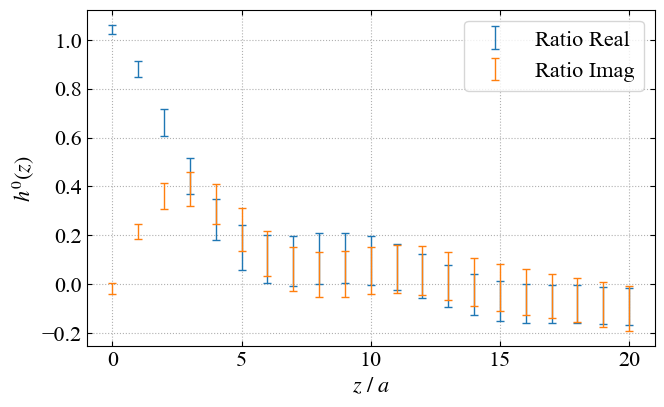

/home/jinchen/git/package/LaMETLat/lametlat/utils/resampling.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  gv_ls = gv.gvar(mean, cov)


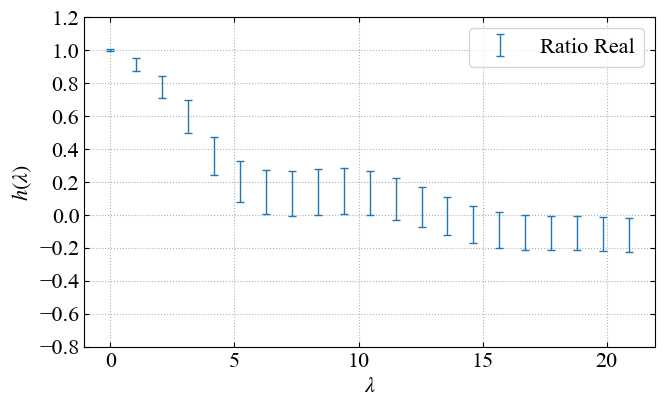

In [11]:
#! plot z-dependence

px = py = 4
pz = 0
b = 0
z_ls = np.arange(21)
tsep_ls = [8, 10, 12]
tau_cut = 3

set_up_log("../log/gsfit/ratio.log")


# * 2pt fit
# Retrieve 2pt data (real parts only, as imaginary parts are not used)
pt2_ss_re = get_2pt_data('SS', px, py, pz, jk_bs="bs")[0]
pt2_ss_avg = bs_ls_avg(pt2_ss_re)

# Perform 2pt fits
ss_fit_res = pt2_two_state_fit(pt2_ss_avg, tmin=3, tmax=13, Lt=Lt, label=f"2pt_P{px}_SS")

re_z_ls, im_z_ls = [], []

for z in z_ls:
    id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}
    
    ra_re, ra_im = get_ratio_data(px, py, pz, b, z, tsep_ls, jk_bs="bs")

    # Average over bootstraps.
    ra_re_avg = bs_ls_avg(ra_re.reshape(len(ra_re), -1)).reshape(len(tsep_ls), -1)
    ra_im_avg = bs_ls_avg(ra_im.reshape(len(ra_im), -1)).reshape(len(tsep_ls), -1)

    ra_re_avg_dic = {}
    ra_im_avg_dic = {}
    for id, tsep in enumerate(tsep_ls):
        ra_re_avg_dic[f'tsep_{tsep}'] = ra_re_avg[id]
        ra_im_avg_dic[f'tsep_{tsep}'] = ra_im_avg[id]


    ra_fit_res = ra_two_state_fit(ra_re_avg_dic, ra_im_avg_dic, tsep_ls, tau_cut, Lt, id_label, pt2_fit_res=ss_fit_res)
    
    print(f"\n>>> P-value of z = {id_label['z']}: ")
    print(ra_fit_res.Q)
    
    re_z_ls.append(ra_fit_res.p["pdf_re"])
    im_z_ls.append(ra_fit_res.p["pdf_im"])
    
fig, ax = default_plot()
ax.errorbar(z_ls, gv.mean(re_z_ls), yerr=gv.sdev(re_z_ls), label="Ratio Real", **errorb)
ax.errorbar(z_ls, gv.mean(im_z_ls), yerr=gv.sdev(im_z_ls), label="Ratio Imag", **errorb)
ax.set_xlabel(r"$z~/~a$", **fs_p)
ax.set_ylabel(r"$h^0 (z)$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()


# ! renormalization
zs = 3
bare_p4 = np.array(re_z_ls) / np.array(re_z_ls)[0]
bare_p0 = gv.load(f"../output/dump/bare_quasi_p0_b0_zdep.pkl")
denominator = np.array(bare_p0["re"]) + 1j * np.array(bare_p0["im"]) # shape = (zmax, N_samp)
denominator[zs:, :] = denominator[zs:zs+1, :]
denominator = bs_ls_avg(denominator.swapaxes(0, 1))

renorm_p4 = np.array(bare_p4) / denominator
lam_ls = z_ls * np.sqrt(2) * a * 2.43 / GEV_FM

fig, ax = default_plot()
ax.errorbar(lam_ls, gv.mean(renorm_p4), yerr=gv.sdev(renorm_p4), label="Ratio Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)
plt.tight_layout()
plt.show()

    

### Summation fit plot

Least Square Fit:
  chi2/dof [dof] = 0.38 [6]    Q = 0.89    logGBF = -17.214

Parameters:
         pdf_re         0.074 (88)        [     0 ± 10 ]  
         pdf_im        -0.058 (94)        [     0 ± 10 ]  
          re_b1         -0.94 (45)        [     0 ± 10 ]  
          im_b1          0.02 (47)        [     0 ± 10 ]  
          re_b2   1.11022e-16 ± 10        [     0 ± 10 ]  
          im_b2   1.11022e-16 ± 10        [     0 ± 10 ]  
       log(dE1)   1.11022e-16 ± 10        [     0 ± 10 ]  
--------------------------------------------------------
            dE1             1 (10)        [     1 (10) ]  

Fit:
      key         y[key]      f(p)[key]
---------------------------------------
     re 0    -0.573 (64)    -0.572 (64)  
        1     -0.41 (21)     -0.42 (19)  
        2     -0.42 (89)     -0.28 (36)  
     im 0    -0.260 (61)    -0.269 (61)  
        1     -0.52 (22)     -0.39 (20)  
        2      0.67 (88)     -0.50 (38)  *

Settings:
  svdcut/n = 1e-12/0    tol = 

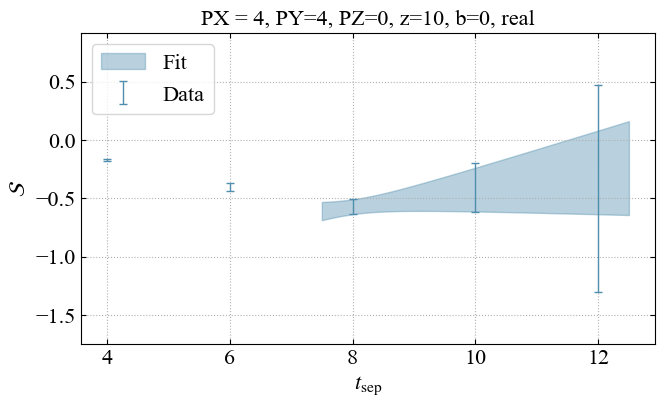

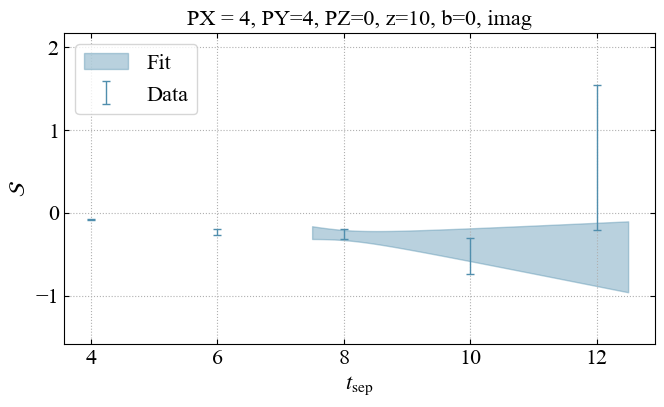

In [12]:
#! plot sum one state fit on data

from lametlat.gsfit.sum_fit import plot_sum_fit_on_data

px = py = 4
pz = 0
b = 0
z = 10
err_tsep_ls = [4, 6, 8, 10, 12]
fill_tsep_ls = [8, 10, 12]
tau_cut = 2

id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

# data for fit
sum_re, sum_im = get_sum_data(px, py, pz, b, z, fill_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
sum_re_avg = bs_ls_avg(sum_re)
sum_im_avg = bs_ls_avg(sum_im)

sum_fit_res = sum_one_state_fit(sum_re_avg, sum_im_avg, fill_tsep_ls, tau_cut, id_label)
print(sum_fit_res.format(100))

# data for errorbar plot
sum_re, sum_im = get_sum_data(px, py, pz, b, z, err_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
sum_re_avg = bs_ls_avg(sum_re)
sum_im_avg = bs_ls_avg(sum_im)

ax_real, ax_imag = plot_sum_fit_on_data(sum_re_avg, sum_im_avg, sum_fit_res, err_tsep_ls, fill_tsep_ls, id_label, tau_cut)

Least Square Fit:
  chi2/dof [dof] = 0.42 [8]    Q = 0.91    logGBF = -17.37

Parameters:
         pdf_re     0.09 (12)     [      0 ± 10 ]  
         pdf_im    -0.05 (13)     [      0 ± 10 ]  
          re_b1    -1.25 (80)     [      0 ± 10 ]  
          im_b1     0.03 (81)     [      0 ± 10 ]  
          re_b2     7.7 (5.9)     [      0 ± 10 ]  
          im_b2    -1.6 (6.0)     [      0 ± 10 ]  
       log(dE1)   -0.836 (81)     [ -0.831 (81) ]  
-------------------------------------------------
            dE1    0.433 (35)     [  0.436 (35) ]  

Fit:
      key         y[key]      f(p)[key]
---------------------------------------
     re 0    -0.405 (33)    -0.409 (33)  
        1    -0.573 (64)    -0.559 (63)  
        2     -0.41 (21)     -0.52 (16)  
        3     -0.42 (89)     -0.39 (35)  
     im 0    -0.231 (41)    -0.239 (41)  
        1    -0.260 (61)    -0.273 (60)  
        2     -0.52 (22)     -0.35 (17)  
        3      0.67 (88)     -0.44 (37)  *

Settings:
  svdcut/n

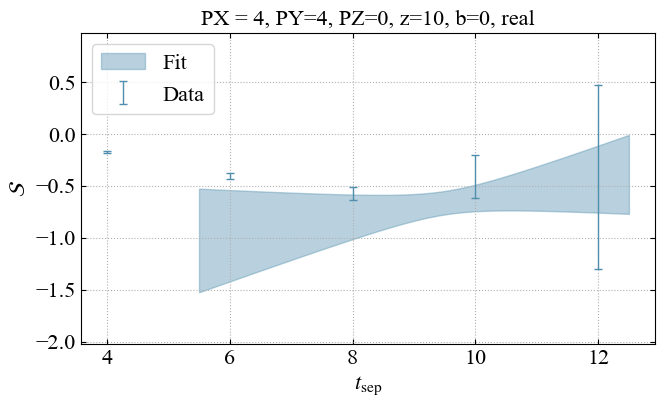

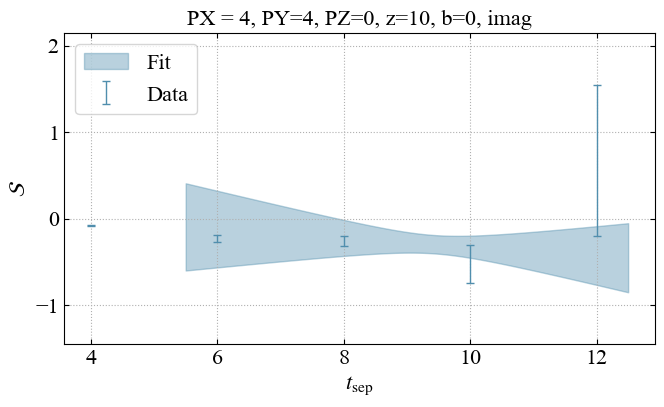

In [13]:
#! plot sum two state fit on data

from lametlat.gsfit.sum_fit import plot_sum_fit_on_data
from lametlat.utils.funcs import add_error_to_sample

px = py = 4
pz = 0
b = 0
z = 10
err_tsep_ls = [4, 6, 8, 10, 12]
fill_tsep_ls = [6, 8, 10, 12]
tau_cut = 2

id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

# * 2pt fit
# Retrieve 2pt data (real parts only, as imaginary parts are not used)
pt2_ss_re = get_2pt_data('SS', px, py, pz, jk_bs="bs")[0]
pt2_ss_avg = bs_ls_avg(pt2_ss_re)

# Perform 2pt fits
ss_fit_res = pt2_two_state_fit(pt2_ss_avg, tmin=3, tmax=13, Lt=Lt, label=f"2pt_P{px}_SS")

# data for fit
sum_re, sum_im = get_sum_data(px, py, pz, b, z, fill_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# * Average over bootstraps.
sum_re_avg = bs_ls_avg(sum_re)
sum_im_avg = bs_ls_avg(sum_im)

# * Take one sample from the bootstraps to check
# sum_re_avg = add_error_to_sample(sum_re)[40]
# sum_im_avg = add_error_to_sample(sum_im)[40]

sum_fit_res = sum_two_state_fit(sum_re_avg, sum_im_avg, fill_tsep_ls, tau_cut, id_label, pt2_fit_res=ss_fit_res)
print(sum_fit_res.format(100))

# data for errorbar plot
sum_re, sum_im = get_sum_data(px, py, pz, b, z, err_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
sum_re_avg = bs_ls_avg(sum_re)
sum_im_avg = bs_ls_avg(sum_im)

ax_real, ax_imag = plot_sum_fit_on_data(sum_re_avg, sum_im_avg, sum_fit_res, err_tsep_ls, fill_tsep_ls, id_label, tau_cut)

Creating new log file: ../log/gsfit/sum.log

>>> P-value of z = 0: 
0.9546541727787394

>>> P-value of z = 1: 
0.9865611349059461

>>> P-value of z = 2: 
0.9870439583312969

>>> P-value of z = 3: 
0.9813582762135231

>>> P-value of z = 4: 
0.9786512637141084

>>> P-value of z = 5: 
0.9753026054869604

>>> P-value of z = 6: 
0.9636546534427259

>>> P-value of z = 7: 
0.940017992454109

>>> P-value of z = 8: 
0.9089958908882229

>>> P-value of z = 9: 
0.8933191377730456

>>> P-value of z = 10: 
0.8949902356372111

>>> P-value of z = 11: 
0.9078890819855839

>>> P-value of z = 12: 
0.9298133939200353

>>> P-value of z = 13: 
0.954395276728178

>>> P-value of z = 14: 
0.9746271645875957

>>> P-value of z = 15: 
0.9900424510321834

>>> P-value of z = 16: 
0.9979564778570728

>>> P-value of z = 17: 
0.9998657763060128

>>> P-value of z = 18: 
0.9999983236272433

>>> P-value of z = 19: 
0.9999997206249658

>>> P-value of z = 20: 
0.9999601882866815


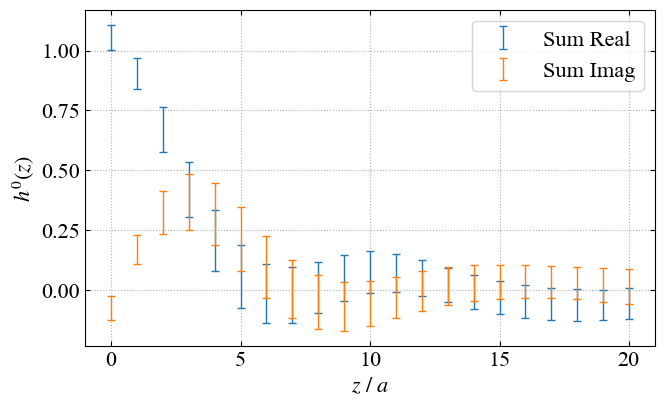

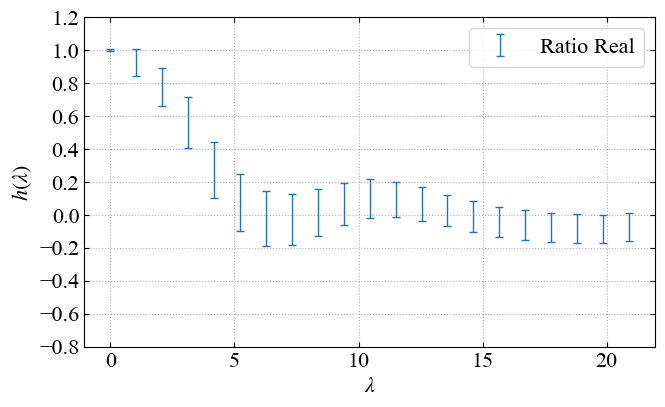

In [14]:
#! plot z-dependence

px = py = 4
pz = 0
b = 0
z_ls = np.arange(21)
tsep_ls = [8, 10, 12]
tau_cut = 2

set_up_log("../log/gsfit/sum.log")

re_z_ls, im_z_ls = [], []

for z in z_ls:
    id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}
    
    sum_re, sum_im = get_sum_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut)

    # Average over bootstraps.
    sum_re_avg = bs_ls_avg(sum_re)
    sum_im_avg = bs_ls_avg(sum_im)


    sum_fit_res = sum_one_state_fit(sum_re_avg, sum_im_avg, tsep_ls, tau_cut, id_label)
    
    print(f"\n>>> P-value of z = {id_label['z']}: ")
    print(sum_fit_res.Q)
    
    re_z_ls.append(sum_fit_res.p["pdf_re"])
    im_z_ls.append(sum_fit_res.p["pdf_im"])
    
fig, ax = default_plot()
ax.errorbar(z_ls, gv.mean(re_z_ls), yerr=gv.sdev(re_z_ls), label="Sum Real", **errorb)
ax.errorbar(z_ls, gv.mean(im_z_ls), yerr=gv.sdev(im_z_ls), label="Sum Imag", **errorb)
ax.set_xlabel(r"$z~/~a$", **fs_p)
ax.set_ylabel(r"$h^0 (z)$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()


# ! renormalization
zs = 3
bare_p4 = np.array(re_z_ls) / np.array(re_z_ls)[0]
bare_p0 = gv.load(f"../output/dump/bare_quasi_p0_b0_zdep.pkl")
denominator = np.array(bare_p0["re"]) + 1j * np.array(bare_p0["im"]) # shape = (zmax, N_samp)
denominator[zs:, :] = denominator[zs:zs+1, :]
denominator = bs_ls_avg(denominator.swapaxes(0, 1))

renorm_p4 = np.array(bare_p4) / denominator
lam_ls = z_ls * np.sqrt(2) * a * 2.43 / GEV_FM

fig, ax = default_plot()
ax.errorbar(lam_ls, gv.mean(renorm_p4), yerr=gv.sdev(renorm_p4), label="Ratio Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)
plt.tight_layout()
plt.show()


### FH fit plot

Least Square Fit:
  chi2/dof [dof] = 0.78 [6]    Q = 0.58    logGBF = -5.0678

Parameters:
         pdf_re    1.025 (27)     [     0 ± 10 ]  
         pdf_im   -0.018 (34)     [     0 ± 10 ]  

Fit:
      key         y[key]      f(p)[key]
---------------------------------------
     re 0     0.969 (76)     1.025 (27)  
        1     1.078 (57)     1.025 (27)  
        2      0.84 (21)     1.025 (27)  
     im 0     0.078 (70)    -0.018 (34)  *
        1    -0.066 (51)    -0.018 (34)  
        2     -0.23 (23)    -0.018 (34)  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf



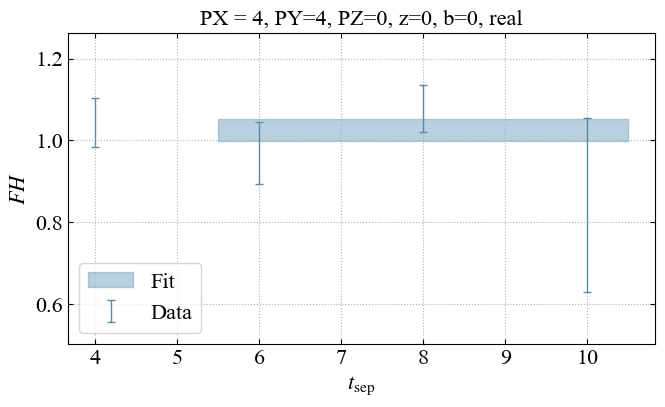

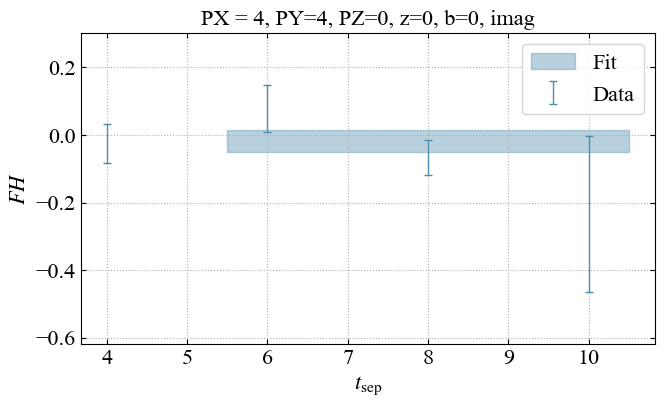

In [15]:
# plot FH fit on data

from lametlat.gsfit.fh_fit import plot_fh_fit_on_data

px = py = 4
pz = 0
b = 0
z = 0
err_tsep_ls = [4, 6, 8, 10, 12]
fill_tsep_ls = [6, 8, 10, 12]
tau_cut = 2

id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

# data for fit
fh_re, fh_im = get_fh_data(px, py, pz, b, z, fill_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
fh_re_avg = bs_ls_avg(fh_re)
fh_im_avg = bs_ls_avg(fh_im)

fh_fit_res = fh_one_state_fit(fh_re_avg, fh_im_avg, fill_tsep_ls, id_label)
print(fh_fit_res.format(100))

# data for errorbar plot
fh_re, fh_im = get_fh_data(px, py, pz, b, z, err_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
fh_re_avg = bs_ls_avg(fh_re)
fh_im_avg = bs_ls_avg(fh_im)

ax_real, ax_imag = plot_fh_fit_on_data(fh_re_avg, fh_im_avg, fh_fit_res, err_tsep_ls, fill_tsep_ls, id_label)

Creating new log file: ../log/gsfit/fh.log

>>> P-value of z = 0: 
0.920668337051027

>>> P-value of z = 1: 
0.4808571063886117

>>> P-value of z = 2: 
0.8649856552308234

>>> P-value of z = 3: 
0.9454479709831844

>>> P-value of z = 4: 
0.956027306258295

>>> P-value of z = 5: 
0.9407234395151817

>>> P-value of z = 6: 
0.8998086984372907

>>> P-value of z = 7: 
0.8200782463418852

>>> P-value of z = 8: 
0.6932322161996158

>>> P-value of z = 9: 
0.5567203054865648

>>> P-value of z = 10: 
0.4489161037786845

>>> P-value of z = 11: 
0.3834908785344388

>>> P-value of z = 12: 
0.38861166174211625

>>> P-value of z = 13: 
0.49132905067982047

>>> P-value of z = 14: 
0.6419756466890905

>>> P-value of z = 15: 
0.7598702744698328

>>> P-value of z = 16: 
0.8345488448732739

>>> P-value of z = 17: 
0.8856324064753811

>>> P-value of z = 18: 
0.9204858234872683

>>> P-value of z = 19: 
0.9349357943855535

>>> P-value of z = 20: 
0.941836178249977


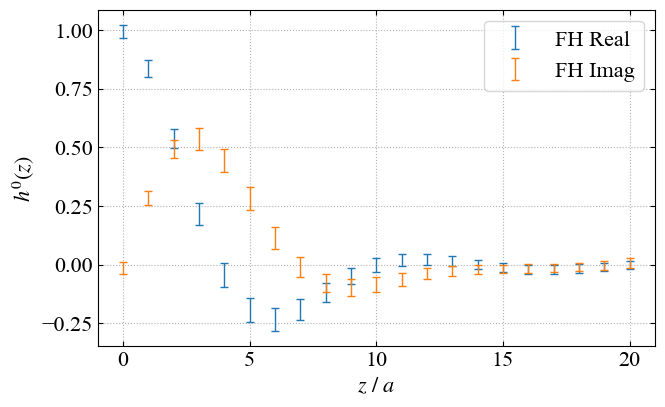

In [16]:
#! plot z-dependence

px = py = 5
pz = 0
b = 0
z_ls = np.arange(21)
tsep_ls = [6, 8, 10, 12]
tau_cut = 2

set_up_log("../log/gsfit/fh.log")

re_z_ls, im_z_ls = [], []

for z in z_ls:
    id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}
    
    fh_re, fh_im = get_fh_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut)

    # Average over bootstraps.
    fh_re_avg = bs_ls_avg(fh_re)
    fh_im_avg = bs_ls_avg(fh_im)


    fh_fit_res = fh_one_state_fit(fh_re_avg, fh_im_avg, tsep_ls, id_label)
    
    print(f"\n>>> P-value of z = {id_label['z']}: ")
    print(fh_fit_res.Q)
    
    re_z_ls.append(fh_fit_res.p["pdf_re"])
    im_z_ls.append(fh_fit_res.p["pdf_im"])
    
fig, ax = default_plot()
ax.errorbar(z_ls, gv.mean(re_z_ls), yerr=gv.sdev(re_z_ls), label="FH Real", **errorb)
ax.errorbar(z_ls, gv.mean(im_z_ls), yerr=gv.sdev(im_z_ls), label="FH Imag", **errorb)
ax.set_xlabel(r"$z~/~a$", **fs_p)
ax.set_ylabel(r"$h^0 (z)$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()

## Plots of quasi z-dependence

In [17]:
from lametlat.utils.constants import *

### Zero momentum normalized sum fit with tsep = 8, 10, 12

(21, 200)


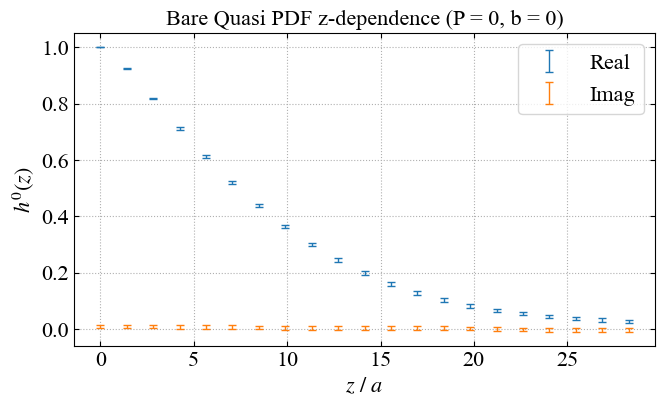

In [18]:
bare_quasi = gv.load("../output/dump/bare_quasi_p0_b0_zdep.pkl")

print(np.shape(bare_quasi["re"]))

bare_quasi_re = bs_ls_avg(np.swapaxes(bare_quasi["re"], 0, 1))
bare_quasi_im = bs_ls_avg(np.swapaxes(bare_quasi["im"], 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

z_ls = np.arange(21) * np.sqrt(2)  # because of off-axis coordinate

ax.errorbar(z_ls, gv.mean(bare_quasi_re), yerr=gv.sdev(bare_quasi_re), label="Real", **errorb)
ax.errorbar(z_ls, gv.mean(bare_quasi_im), yerr=gv.sdev(bare_quasi_im), label="Imag", **errorb)

ax.set_xlabel(r"$z~/~a$", **fs_p)
ax.set_ylabel(r"$h^0 (z)$", **fs_p)
ax.legend(**fs_p)

plt.title("Bare Quasi PDF z-dependence (P = 0, b = 0)", **fs_p)
plt.tight_layout()
plt.show()


### Renormalized P4 ratio fit with tsep = 8, 10, 12

(16, 200)


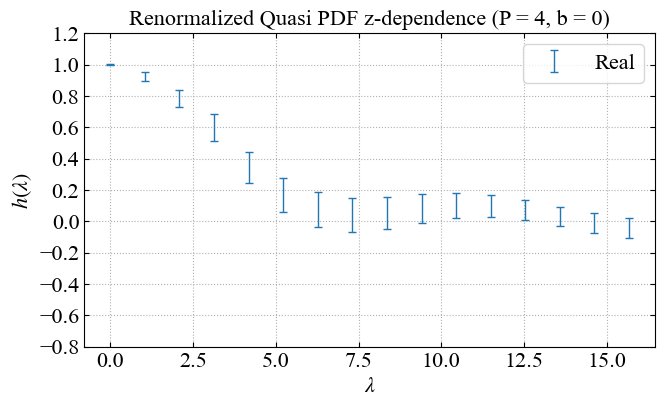

In [19]:
renorm_quasi_re = gv.load("../output/dump/renorm_p4_ratio_81012.pkl")
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(16) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P4 ratio fit with tsep = 8, 10, 12, taucut = 3

(16, 200)


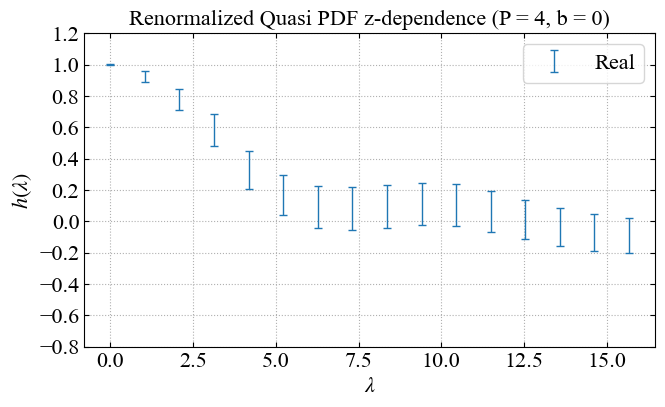

In [20]:
renorm_quasi_re = gv.load("../output/dump/renorm_p4_ratio_81012_taucut_3.pkl")
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(16) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P4 sum fit with tsep = 8, 10, 12

(21, 200)


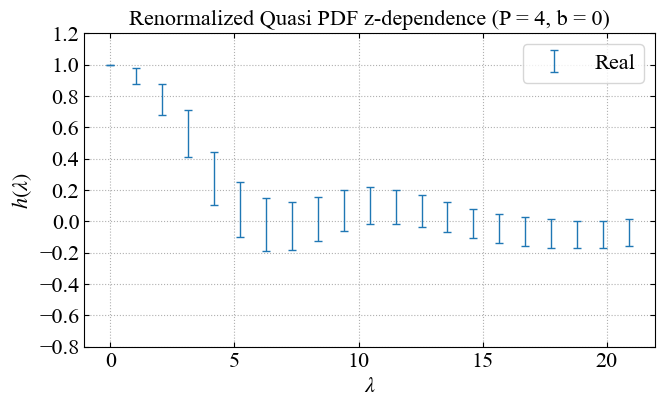

In [55]:
# renorm_quasi_re = gv.load("../output/dump/renorm_quasi_p45_b0_sum_81012.pkl")["re_p4"]
renorm_quasi_re = gv.load("../cache/renorm_quasi_p45_b0_zs3_sum_81012.dat")["re_p4"] # * check the cache file
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(21) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P5 sum fit with tsep = 8, 10, 12

(21, 200)


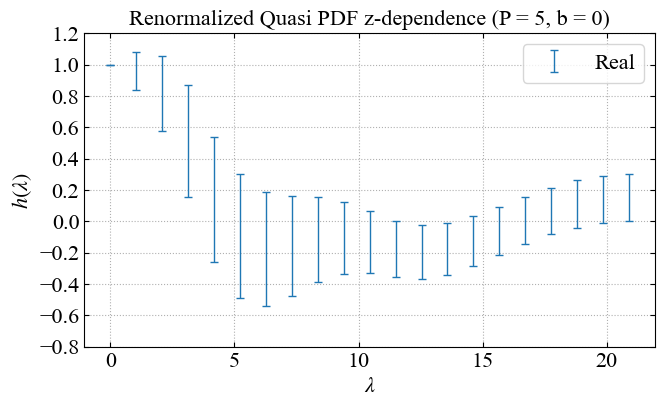

In [56]:
# renorm_quasi_re = gv.load("../output/dump/renorm_quasi_p45_b0_sum_81012.pkl")["re_p5"]
renorm_quasi_re = gv.load("../cache/renorm_quasi_p45_b0_zs3_sum_81012.dat")["re_p5"] # * check the cache file
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(21) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 5, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P4 fh fit with tsep = 6, 8, 10, 12

(16, 200)


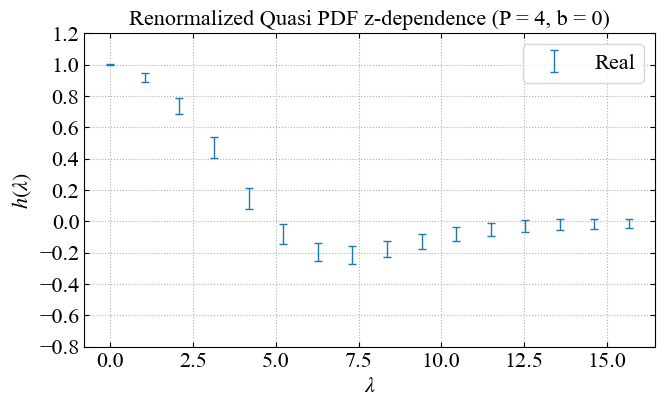

In [23]:
renorm_quasi_re = gv.load("../output/dump/renorm_p4_fh_681012.pkl")
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(16) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P4 fh fit with tsep = 8, 10, 12

(16, 200)


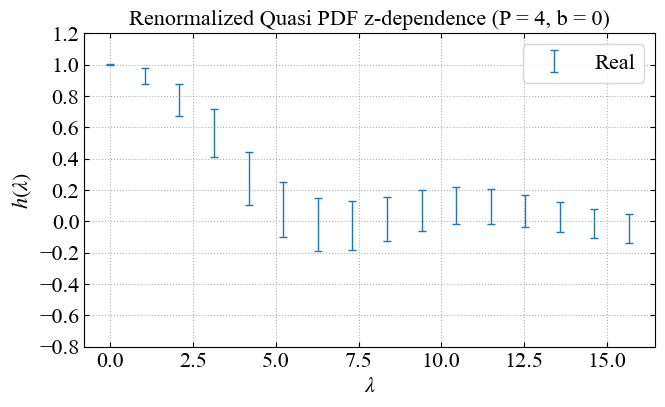

In [24]:
renorm_quasi_re = gv.load("../output/dump/renorm_p4_fh_81012.pkl")
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(16) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P4 sum two state fit with tsep = 4, 6, 8, 10, 12

(16, 200)


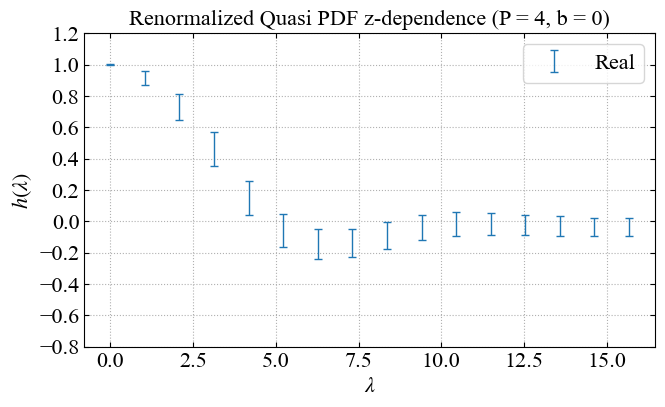

In [25]:
renorm_quasi_re = gv.load("../output/dump/renorm_p4_sum_two_state_4681012.pkl")
print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(16) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P4 sum two state fit with tsep = 6, 8, 10, 12

(21, 200)


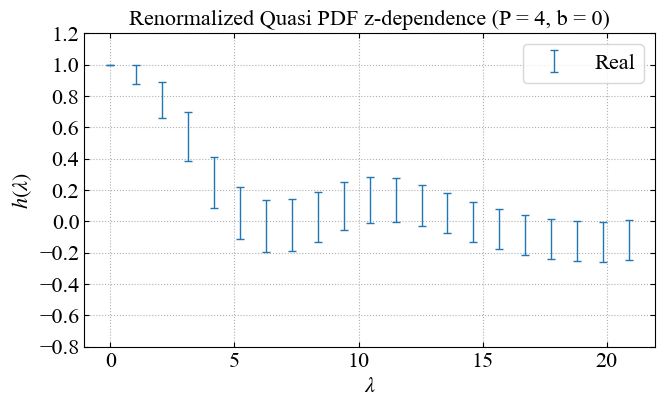

In [51]:
# renorm_quasi_re = gv.load("../output/dump/renorm_quasi_p45_b0_sum_two_state_681012.pkl")["re_p4"]
renorm_quasi_re = gv.load("../cache/renorm_quasi_p45_b0_zs3_sum_two_state_681012.dat")["re_p4"] # * check the cache file

print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(21) * np.sqrt(2) * a * 2.43 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 4, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

### Renormalized P5 sum two state fit with tsep = 6, 8, 10, 12

(21, 200)


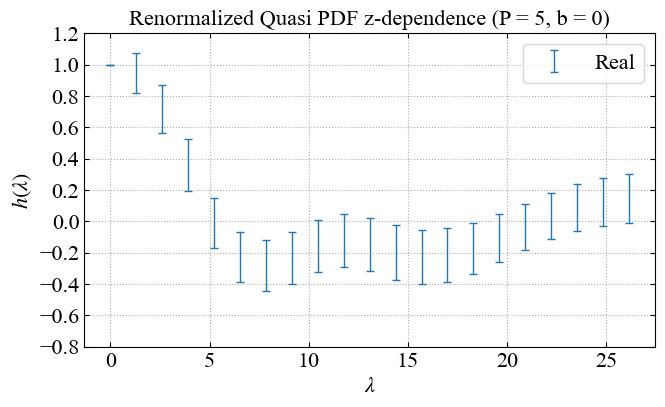

In [52]:
# renorm_quasi_re = gv.load("../output/dump/renorm_quasi_p45_b0_sum_two_state_681012.pkl")["re_p5"]
renorm_quasi_re = gv.load("../cache/renorm_quasi_p45_b0_zs3_sum_two_state_681012.dat")["re_p5"] # * check the cache file

print(np.shape(renorm_quasi_re))

renorm_quasi_avg = bs_ls_avg(np.swapaxes(renorm_quasi_re, 0, 1))

# Plot the bare quasi z-dependence
fig, ax = default_plot()

lam_ls = np.arange(21) * np.sqrt(2) * a * 3.04 / GEV_FM  # because of off-axis coordinate

ax.errorbar(lam_ls, gv.mean(renorm_quasi_avg), yerr=gv.sdev(renorm_quasi_avg), label="Real", **errorb)
ax.set_xlabel(r"$\lambda$", **fs_p)
ax.set_ylabel(r"$h (\lambda)$", **fs_p)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(**fs_p)
ax.set_ylim(-0.8, 1.2)

plt.title("Renormalized Quasi PDF z-dependence (P = 5, b = 0)", **fs_p)
plt.tight_layout()
plt.show()

## Plots of x-dependence

(200, 4000)


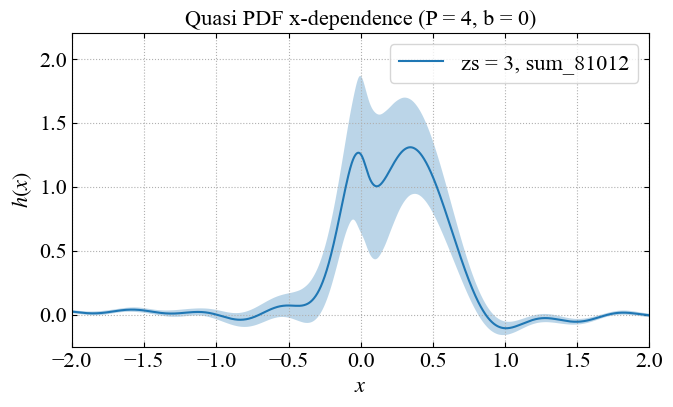

In [62]:
fit_method = "sum_81012"
px = 4
zs = 3
xdep_quasi = gv.load(f"../output/dump/xdep_collection_p45_b0_zsmix_{fit_method}.dat")[f"re_p{px}_b0_zs{zs}"]
print(np.shape(xdep_quasi))

xdep_quasi_avg = bs_ls_avg(xdep_quasi)

# Plot the bare quasi z-dependence
fig, ax = default_plot()

nn = 4000
xmin = -1.99951
xmax = 2.00049
x_ls = np.linspace(xmin, xmax, nn)

ax.fill_between(x_ls, gv.mean(xdep_quasi_avg) - gv.sdev(xdep_quasi_avg), gv.mean(xdep_quasi_avg) + gv.sdev(xdep_quasi_avg), alpha=0.3)

ax.plot(x_ls, gv.mean(xdep_quasi_avg), label=f"zs = {zs}, {fit_method}")

ax.set_xlabel(r"$x$", **fs_p)
ax.set_ylabel(r"$h (x)$", **fs_p)
ax.legend(**fs_p)
ax.set_xlim(-2, 2)
ax.set_ylim(-0.25, 2.2)
plt.title(f"Quasi PDF x-dependence (P = {px}, b = 0)", **fs_p)
plt.tight_layout()
plt.show()